In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data',one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
type(mnist.train.images)

numpy.ndarray

In [12]:
sample = mnist.train.images[2].reshape(28,28)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

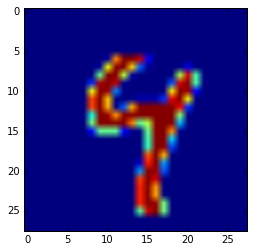

In [13]:
plt.imshow(sample)

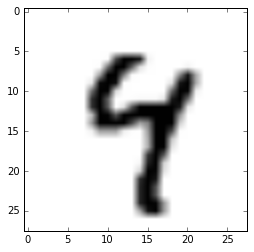

In [14]:
plt.imshow(sample,cmap='Greys')

In [16]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [18]:
n_classes = 10 # qty outputs to predict (0 to 9)
n_samples = mnist.train.num_examples

In [19]:
n_input = 784 # img is 28 x 28

In [20]:
n_hidden_1 = 256 # hidden layer

In [21]:
n_hidden_2 = 256 # hidden layer

In [31]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholdes for data input
    weights: dics of weighhts
    biases: dict of bias values
    '''
    # First hidden layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU(X * W + B) = f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    # second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #last output layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer

In [23]:
weights = {
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [24]:
weights

{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [25]:
biases = {
    'b1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
}

In [26]:
x = tf.placeholder('float',[None,n_input])

In [27]:
y = tf.placeholder('float',[None,n_classes])

In [32]:
pred = multilayer_perceptron(x,weights,biases)

In [33]:
pred

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [36]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## TRAINING MODEL

In [39]:
t = mnist.train.next_batch(1)

In [40]:
Xsamp,ysamp = t

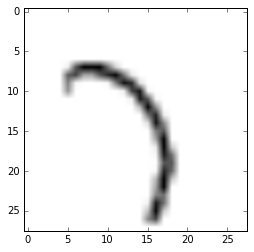

In [42]:
plt.imshow(Xsamp.reshape(28,28),cmap='Greys')

In [43]:
ysamp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

## RUN THE Session

In [44]:
sess = tf.InteractiveSession()

In [45]:
# initialize variables

In [47]:
init = tf.global_variables_initializer()

In [48]:
sess.run(init)

In [49]:
#15 loops
for epoch in range(training_epochs):
    #cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer,cost],feed_dict={x: batch_x,y: batch_y})
        
        avg_cost += c/total_batch
        
    print("Epoch: {} cost {:.4f}".format(epoch+1,avg_cost))
print("Model has completed {} epochs of training".format(training_epochs))

Epoch: 1 cost146.1645
Epoch: 2 cost37.1289
Epoch: 3 cost23.7320
Epoch: 4 cost16.5662
Epoch: 5 cost12.0930
Epoch: 6 cost8.9387
Epoch: 7 cost6.7545
Epoch: 8 cost5.0267
Epoch: 9 cost3.7361
Epoch: 10 cost2.7652
Epoch: 11 cost2.1743
Epoch: 12 cost1.6232
Epoch: 13 cost1.2304
Epoch: 14 cost0.9135
Epoch: 15 cost0.8603
Model has completed 15 epochs of training


## Model evaluations

In [51]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [52]:
print(correct_predictions)

Tensor("Equal:0", shape=(?,), dtype=bool)


In [53]:
correct_predictions = tf.cast(correct_predictions,'float')

In [54]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=float32)


In [55]:
accuracy = tf.reduce_mean(correct_predictions)

In [56]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [57]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [58]:
accuracy.eval({x : mnist.test.images,y:mnist.test.labels})

0.94279999